# EEG Resolution Estimation


In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from utils import compute_eeg_transfer_function

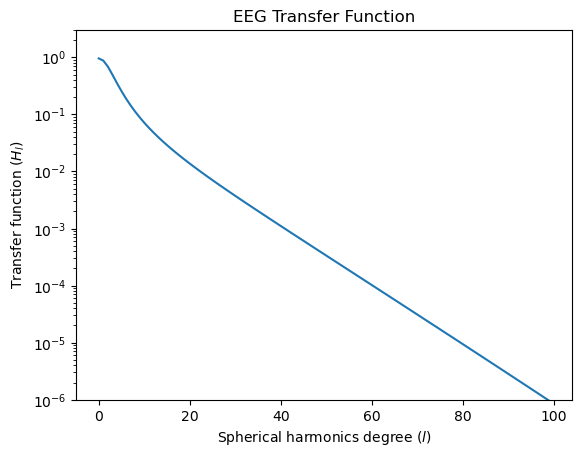

In [47]:
radii = [7.9, 8.0, 8.6, 9.1]
conductivities = [1, 5, 1 / 15, 1]

l_max = 100

H = compute_eeg_transfer_function(conductivities, radii, l_max)

l_values = np.arange(l_max)

plt.plot(H)
plt.xlabel("Spherical harmonics degree ($l$)")
plt.ylabel("Transfer function ($H_l$)")
plt.ylim(1e-6, 3)
plt.yscale("log")
plt.title("EEG Transfer Function")
plt.savefig("imgs/Fig_5_EEG_Transfer_Function.png")
plt.show()

## What if the skull had a lower conductivity?


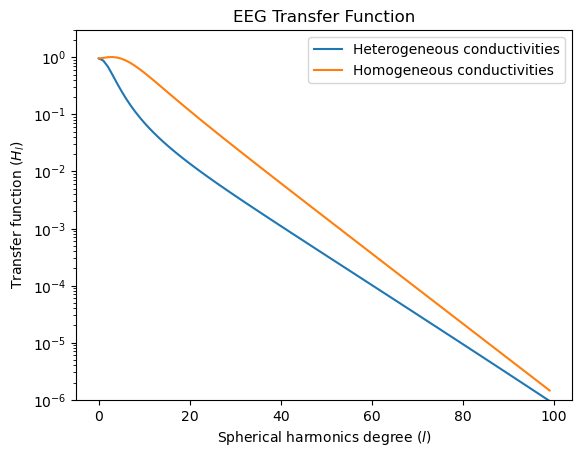

In [42]:
conductivities_homogeneous = [1, 1, 1, 1]

H_homo = compute_eeg_transfer_function(conductivities_homogeneous, radii, l_max)

# noise_values = 2 * l_values + 1

plt.plot(H, label="Heterogeneous conductivities")
plt.plot(H_homo, label="Homogeneous conductivities")
# plt.plot(1e-3 * noise_values, linestyle="dashed", label="Noise (2l + 1)", color="black")
plt.legend()
plt.ylim(1e-6, 3)
plt.xlabel("Spherical harmonics degree ($l$)")
plt.ylabel("Transfer function ($H_l$)")
plt.yscale("log")
plt.title("EEG Transfer Function")
plt.show()

## MEG

In MEG, the SQUID detectors are placed 2 cm away from the brain (since the detectors are really cold)


/Users/rhotter/code/eeg/utils.py:63: RuntimeWarning: divide by zero encountered in scalar divide
  return (sigma - zetta_ip1) / ((l + 1) * sigma + zetta_ip1)
/Users/rhotter/code/eeg/utils.py:79: RuntimeWarning: invalid value encountered in scalar divide
  return num / denom
/Users/rhotter/code/eeg/utils.py:98: RuntimeWarning: invalid value encountered in scalar multiply
  B = gamma_i * A


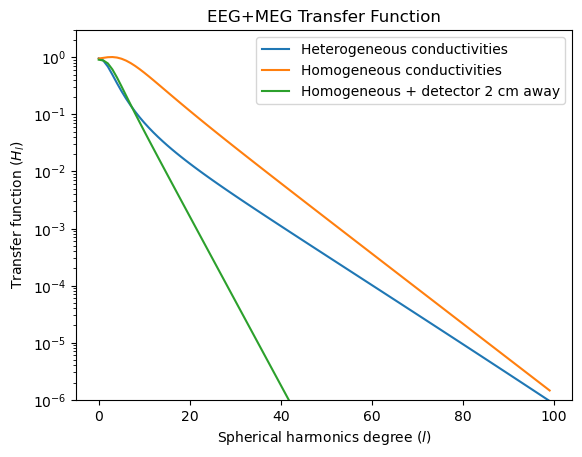

In [43]:
# simulate SQUID-MEG transfer function
radii_far = [7.9, 8.0, 8.6, 9.1, 11.1]
conductivities_homogeneous = [1, 1, 1, 1, 1]

H_meg_far = compute_eeg_transfer_function(conductivities_homogeneous, radii_far, l_max)

plt.plot(H, label="Heterogeneous conductivities")
plt.plot(H_homo, label="Homogeneous conductivities")
plt.plot(H_meg_far, label="Homogeneous + detector 2 cm away")
plt.ylim(1e-6, 3)

plt.legend()
plt.xlabel("Spherical harmonics degree ($l$)")
plt.ylabel("Transfer function ($H_l$)")
plt.yscale("log")
plt.title("EEG+MEG Transfer Function")
plt.show()

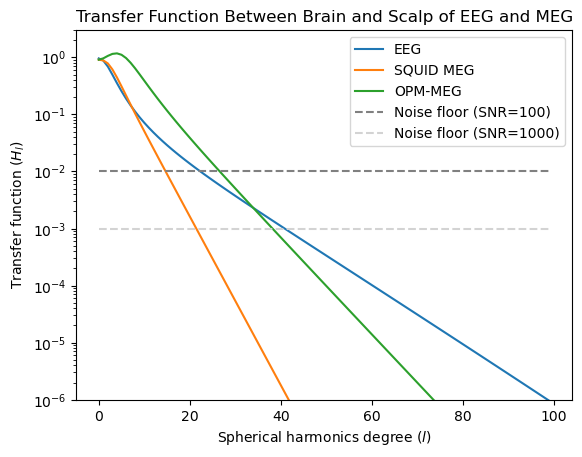

In [44]:
radii_far = [7.9, 8.0, 8.6, 9.1, 11.1]
radii_closer = [7.9, 8.0, 8.6, 9.1, 9.6]

conductivities_homogeneous = [1, 1, 1, 1, 1]
H_meg_far = compute_eeg_transfer_function(conductivities_homogeneous, radii_far, l_max)
H_meg_closer = compute_eeg_transfer_function(conductivities_homogeneous, radii_closer, l_max)

# simulate SQUID-MEG transfer function

# Add noise floors at SNR=100 and SNR=1000
noise_floor_100 = np.ones(len(H)) * 1e-2  # 10^-2 = 1/100 for SNR=100
noise_floor_1000 = np.ones(len(H)) * 1e-3  # 10^-3 = 1/1000 for SNR=1000

fig, ax1 = plt.subplots()

# Plot on primary y-axis
ax1.plot(H, label="EEG")
ax1.plot(H_meg_far, label="SQUID MEG")
ax1.plot(H_meg_closer, label="OPM-MEG")
ax1.plot(noise_floor_100, '--', label="Noise floor (SNR=100)", color='gray')
ax1.plot(noise_floor_1000, '--', label="Noise floor (SNR=1000)", color='lightgray')
ax1.set_ylim(1e-6, 3)

ax1.legend()
ax1.set_xlabel("Spherical harmonics degree ($l$)")
ax1.set_ylabel("Transfer function ($H_l$)")
ax1.set_yscale("log")
ax1.set_title("Transfer Function Between Brain and Scalp of EEG and MEG")

plt.show()

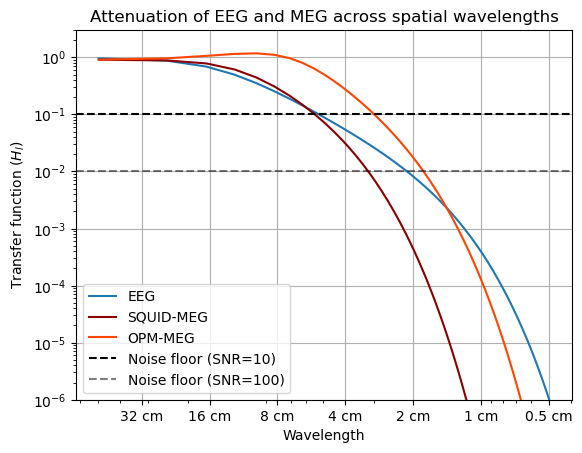

In [50]:
wavelength = 2 * np.pi * radii[0] / (l_values+1)

plt.figure()
plt.loglog(wavelength, H, label="EEG")
plt.loglog(wavelength, H_meg_far, label="SQUID-MEG", color='darkred')
plt.loglog(wavelength, H_meg_closer, label="OPM-MEG", color='orangered')
plt.axhline(y=1e-1, linestyle='--', color='black', label="Noise floor (SNR=10)")
plt.axhline(y=1e-2, linestyle='--', color='black', label="Noise floor (SNR=100)", alpha=0.5)
plt.gca().invert_xaxis()  # Invert x-axis to show higher wavelengths on left
plt.ylim(1e-6, 3)
plt.grid(True)

# Set custom tick positions
tick_positions = [0.5, 1, 2, 4, 8, 16, 32]
plt.xticks(tick_positions, [f'{x} cm' for x in tick_positions])

plt.xlabel("Wavelength")
plt.ylabel("Transfer function ($H_l$)")
plt.title("Attenuation of EEG and MEG across spatial wavelengths")
plt.legend()
plt.savefig("imgs/Attenuation_vs_wavelength.png")
